In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:

# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:

# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [7]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/var/folders/y5/r0_g_xx95nb6fbmlxkp859jw0000gn/T/ipykernel_8912/1249557430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']


In [9]:
# Convert these to numpy arrays
X = X.values
y = y.values


In [10]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [23]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 10000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.4907138393027708e-05
Epoch: 10 and loss: 1.4811833352723625e-05
Epoch: 20 and loss: 1.4726386325492058e-05
Epoch: 30 and loss: 1.4639002074545715e-05
Epoch: 40 and loss: 1.4543699762725737e-05
Epoch: 50 and loss: 1.444938789063599e-05
Epoch: 60 and loss: 1.4355048733705189e-05
Epoch: 70 and loss: 1.4253760127758142e-05
Epoch: 80 and loss: 1.4158441445033532e-05
Epoch: 90 and loss: 1.4061129149922635e-05
Epoch: 100 and loss: 1.396382231177995e-05
Epoch: 110 and loss: 1.386253734381171e-05
Epoch: 120 and loss: 1.3763244169240352e-05
Epoch: 130 and loss: 1.3662954188475851e-05
Epoch: 140 and loss: 1.3562665117206052e-05
Epoch: 150 and loss: 1.3464363291859627e-05
Epoch: 160 and loss: 1.3368046893447172e-05
Epoch: 170 and loss: 1.3269744158606045e-05
Epoch: 180 and loss: 1.3168461009627208e-05
Epoch: 190 and loss: 1.3071152352495119e-05
Epoch: 200 and loss: 1.2975827303307597e-05
Epoch: 210 and loss: 1.287752456846647e-05
Epoch: 220 and loss: 1.2780214092344977e-05
Epo

Text(0.5, 0, 'Epoch')

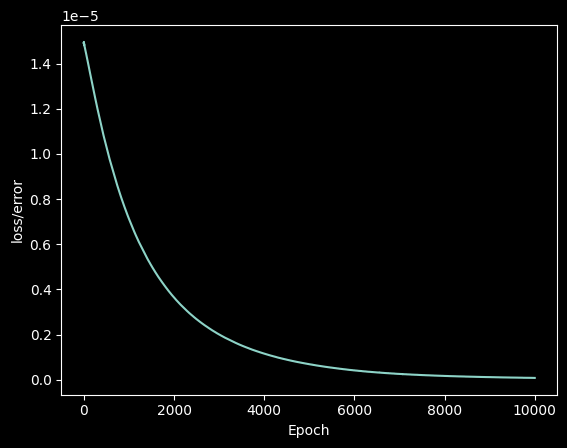

In [24]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [25]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [26]:
loss

tensor(1.9078)

In [27]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-27.8776,  -3.5807,  41.9357]) 	 2 	 2
2.)  tensor([-37.7545, -24.5728,  77.5259]) 	 2 	 2
3.)  tensor([-44.9112, -28.4073,  91.1851]) 	 2 	 2
4.)  tensor([ 25.1931,  54.1024, -38.3890]) 	 1 	 1
5.)  tensor([-36.3068, -16.5864,  67.0927]) 	 2 	 2
6.)  tensor([ 43.0374,  70.5802, -61.8740]) 	 1 	 1
7.)  tensor([-28.9981,  -3.4005,  43.2729]) 	 2 	 2
8.)  tensor([ 23.9220,  52.4456, -36.6419]) 	 1 	 1
9.)  tensor([-32.2632,  -9.6630,  54.3146]) 	 2 	 2
10.)  tensor([-40.6045, -27.6281,  84.5990]) 	 2 	 2
11.)  tensor([-20.4324,   7.1915,  27.3223]) 	 2 	 2
12.)  tensor([ 214.8446,  194.9778, -270.9308]) 	 0 	 0
13.)  tensor([ 198.3815,  179.6526, -250.0186]) 	 0 	 0
14.)  tensor([ 59.0343,  77.2357, -80.6811]) 	 1 	 1
15.)  tensor([ 183.3274,  169.2125, -232.3473]) 	 0 	 0
16.)  tensor([-3.6047, 28.5438, -0.6372]) 	 2 	 1
17.)  tensor([ 198.9248,  180.9631, -251.0746]) 	 0 	 0
18.)  tensor([-22.9370,   3.5785,  31.6301]) 	 1 	 2
19.)  tensor([ 228.3572,  205.8691, -287.3517]